# Ejemplos PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
def run_pca(data, n_components=2, include_screeplot=True):
    # Estandarizar los datos (centrar los datos en torno a 0 y escalarlos a varianza unitaria)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    display(data_scaled)

     # Calcular la varianza de cada columna de los datos estandarizados
    standardized_column_variance = np.var(data_scaled, ddof=1, axis=0)
    print("\nVarianza de cada columna (datos estandarizados):")
    for i, variance in enumerate(standardized_column_variance):
        print(f"Columna {i+1}: {variance:.4f}")

    # Calcular la matriz de covarianza
    covariance_matrix = np.cov(data_scaled.T)
    print("Matriz de Covarianza:")
    print(covariance_matrix)

    # Aplicar PCA
    pca = PCA(n_components=n_components)  # Limitamos los n_components
    data_pca = pca.fit_transform(data_scaled)

    # Contribuciones (varianza explicada por cada componente principal)
    explained_variances = pca.explained_variance_ratio_
    eigenvalues = pca.explained_variance_
    eigenvectors = pca.components_
    pcs = np.arange(1, len(explained_variances) + 1)

    # Mostrar resultados
    print("Contribución de cada Componente Principal (PC):")
    for i, variance in enumerate(explained_variances):
        print(f"PC{i+1}: {variance*100:.2f}% de la varianza total")

    # Imprimir autovalores y autovectores
    print("\nAutovalores (Valores Propios):")
    for i, eigenvalue in enumerate(eigenvalues):
        print(f"Autovalor {i+1}: {eigenvalue:.4f}")

    print("\nAutovectores (Vectores Propios):")
    for i, eigenvector in enumerate(eigenvectors):
        print(f"Autovector {i+1}: {eigenvector}")

    # Graficar la contribución de cada componente principal
    plt.figure(figsize=(8, 5))
    plt.bar(pcs, explained_variances * 100, color='blue', alpha=0.7)
    plt.xlabel('Componentes Principales (PC)')
    plt.ylabel('% de Varianza Explicada')
    plt.title('Contribuciones de cada Componente Principal (PCA)')
    plt.show()

    '''
    explained_variance = pca.explained_variance_ratio_
    plt.plot(pca.explained_variance_, marker='o')
    plt.xlabel("Eigenvalue number")
    plt.ylabel("Eigenvalue size")
    plt.title("Scree Plot")
    plt.show()
    '''
    if include_screeplot:
      # Mostrar el número de componentes seleccionados
      n_components_selected = pca.n_components_
      explained_variance_ratio = pca.explained_variance_ratio_.sum()
      print(f"Número de componentes seleccionados: {n_components_selected}")
      print(f"Varianza explicada por estos componentes: {explained_variance_ratio*100:.2f}%")

      # 3. Visualización: Scree Plot
      plt.figure(figsize=(8, 5))
      plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
      plt.title('Scree Plot: Varianza explicada acumulada por componente')
      plt.xlabel('Número de componentes principales')
      plt.ylabel('Varianza explicada acumulada')
      plt.axhline(y=0.80, color='r', linestyle='-')
      plt.text(0.5, 0.85, '80% de varianza explicada', color = 'red', fontsize=12)
      plt.grid(True)
      plt.show()

## 0. Calculo manual

* https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/

In [2]:
import numpy as np
from numpy import mean
from numpy import cov
from numpy.linalg import eig

In [8]:
# define a matrix
print("\n 1. Define a matrix")
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A)

# calculate the mean of each column
# NOTE: alternative -> use standardscaling
print("\n 2. Calculate the mean of each column")
M = mean(A.T, axis=1)
print(M)

# center columns by subtracting column means
print("\n 3. Center columns by subtracting column means")
C = A - M
print(C)

# calculate covariance matrix of centered matrix
print("\n 4. Calculate covariance matrix of centered matrix")
V = cov(C.T)
print(V)

# eigendecomposition of covariance matrix
print("\n 5. Eigendecomposition of covariance matrix")
values, vectors = eig(V)
print("Eigenvalues:", values)
print("Eigenvectors:\n", vectors)


# project data
print("\n 6. Project data")
P = vectors.T.dot(C.T)
print(P.T)


 1. Define a matrix
[[1 2]
 [3 4]
 [5 6]]

 2. Calculate the mean of each column
[3. 4.]

 3. Center columns by subtracting column means
[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]

 4. Calculate covariance matrix of centered matrix
[[4. 4.]
 [4. 4.]]

 5. Eigendecomposition of covariance matrix
Eigenvalues: [8. 0.]
Eigenvectors:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

 6. Project data
[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


## 1. Ejemplo sencillo

array([[ 0.09053575,  0.        ],
       [-1.26750044, -1.22474487],
       [ 1.1769647 ,  1.22474487]])


Varianza de cada columna (datos estandarizados):
Columna 1: 1.5000
Columna 2: 1.5000
Matriz de Covarianza:
[[1.5        1.49692307]
 [1.49692307 1.5       ]]
Contribución de cada Componente Principal (PC):
PC1: 99.90% de la varianza total
PC2: 0.10% de la varianza total

Autovalores (Valores Propios):
Autovalor 1: 2.9969
Autovalor 2: 0.0031

Autovectores (Vectores Propios):
Autovector 1: [0.70710678 0.70710678]
Autovector 2: [-0.70710678  0.70710678]


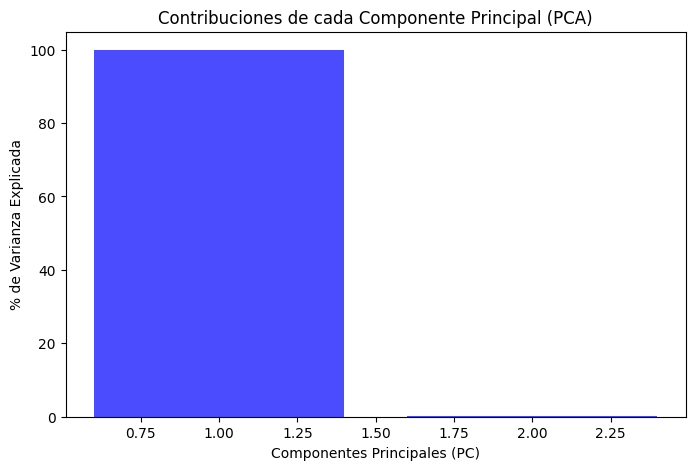

In [ ]:
# Ejemplo de uso
data = np.array([
    [100, 3],
    [75, 2],
    [120, 4]
])

run_pca(data, include_screeplot=False)

## 2. Ejemplo PCA - con más variables

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine

In [ ]:
# Load the wine dataset
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])


Varianza de cada columna (datos estandarizados):
Columna 1: 1.0056
Columna 2: 1.0056
Columna 3: 1.0056
Columna 4: 1.0056
Columna 5: 1.0056
Columna 6: 1.0056
Columna 7: 1.0056
Columna 8: 1.0056
Columna 9: 1.0056
Columna 10: 1.0056
Columna 11: 1.0056
Columna 12: 1.0056
Columna 13: 1.0056
Matriz de Covarianza:
[[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -

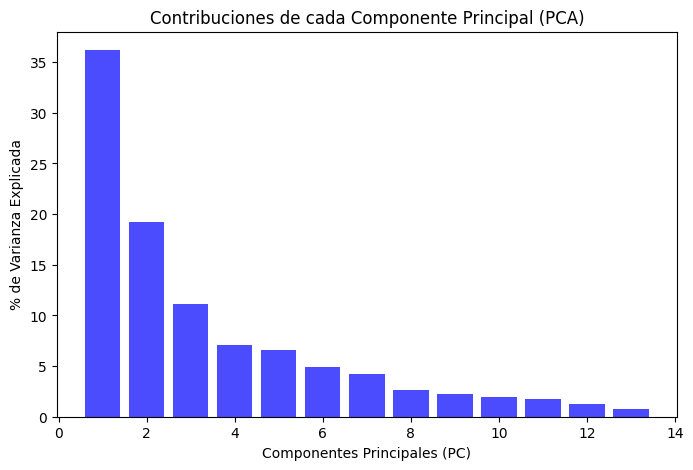

Número de componentes seleccionados: 13
Varianza explicada por estos componentes: 100.00%


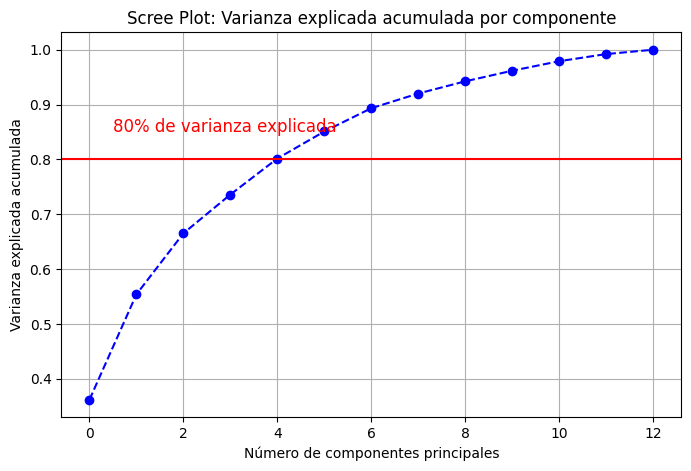

In [ ]:
run_pca(wine_df, n_components=len(wine_df.columns))

## 3. PCA para extracción de features antes de usar un modelo de ML

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits, load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

#### Ejemplo 1

In [ ]:
# 1. Cargar el dataset de dígitos
digits = load_digits()
X = digits.data  # Características (784 variables por imagen)
y = digits.target  # Etiquetas (0 a 9)

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 2. Aplicar PCA para reducir dimensionalidad
pca = PCA(n_components=0.80)  # Selecciona automáticamente el número de componentes que expliquen el 80% de la varianza
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print("Nb columns (before):", X_train.shape[1])
print("Nb columns (after):", X_train_pca.shape[1])

# 3. Entrenar un modelo supervisado (sin PCA)
model_original = LogisticRegression(max_iter=10000, solver='lbfgs')
model_original.fit(X_train, y_train)

# Predicciones y métricas sin PCA
y_pred_original = model_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
f1_original = f1_score(y_test, y_pred_original, average='weighted')

print("Resultados sin PCA:")
print(f"Accuracy: {accuracy_original:.4f}")
print(f"F1 Score: {f1_original:.4f}")

# 4. Entrenar un modelo supervisado (con PCA)
model_pca = LogisticRegression(max_iter=10000, solver='lbfgs')
model_pca.fit(X_train_pca, y_train)

# Predicciones y métricas con PCA
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca, average='weighted')

print("\nResultados con PCA:")
print(f"Accuracy: {accuracy_pca:.4f}")
print(f"F1 Score: {f1_pca:.4f}")

# 5. Comparar resultados
if accuracy_pca > accuracy_original:
    print("\nEl uso de PCA mejoró la precisión del modelo.")
else:
    print("\nEl uso de PCA no mejoró la precisión del modelo.")

if f1_pca > f1_original:
    print("El uso de PCA mejoró el F1 score del modelo.")
else:
    print("El uso de PCA no mejoró el F1 score del modelo.")

Nb columns (before): 64
Nb columns (after): 21
Resultados sin PCA:
Accuracy: 0.9704
F1 Score: 0.9705

Resultados con PCA:
Accuracy: 0.9315
F1 Score: 0.9317

El uso de PCA no mejoró la precisión del modelo.
El uso de PCA no mejoró el F1 score del modelo.


#### Ejemplo 2

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# 1. Cargar el dataset de cáncer de mama
cancer = load_breast_cancer()
X = cancer.data  # Características (30 variables)
y = cancer.target  # Etiquetas (0 o 1, benigno o maligno)

# Check dataset
df_aux = pd.DataFrame(cancer.data, columns=cancer.feature_names)
display(df_aux.head())

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 2. Aplicar PCA para reducir dimensionalidad explicando al menos el 80% de la varianza
pca = PCA(n_components=0.80)  # Seleccionar automáticamente los componentes que expliquen el 80% de la varianza
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print("Nb columns (before):", X_train.shape[1])
print("Nb columns (after):", X_train_pca.shape[1])

# Mostrar el número de componentes seleccionados
n_components_selected = pca.n_components_
explained_variance_ratio = pca.explained_variance_ratio_.sum()
print(f"Número de componentes seleccionados: {n_components_selected}")
print(f"Varianza explicada por estos componentes: {explained_variance_ratio*100:.2f}%")

# 3. Entrenar un modelo supervisado (sin PCA)
model_original = LogisticRegression(max_iter=10000, solver='lbfgs')
model_original.fit(X_train, y_train)

# Predicciones y métricas sin PCA
y_pred_original = model_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
f1_original = f1_score(y_test, y_pred_original)

print("\nResultados sin PCA:")
print(f"Accuracy: {accuracy_original:.4f}")
print(f"F1 Score: {f1_original:.4f}")

# 4. Entrenar un modelo supervisado (con PCA)
model_pca = LogisticRegression(max_iter=10000, solver='lbfgs')
model_pca.fit(X_train_pca, y_train)

# Predicciones y métricas con PCA
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)

print("\nResultados con PCA:")
print(f"Accuracy: {accuracy_pca:.4f}")
print(f"F1 Score: {f1_pca:.4f}")

# 5. Comparar resultados
if accuracy_pca > accuracy_original:
    print("\nEl uso de PCA mejoró la precisión del modelo.")
else:
    print("\nEl uso de PCA no mejoró la precisión del modelo.")

if f1_pca > f1_original:
    print("El uso de PCA mejoró el F1 score del modelo.")
else:
    print("El uso de PCA no mejoró el F1 score del modelo.")


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Nb columns (before): 30
Nb columns (after): 5
Número de componentes seleccionados: 5
Varianza explicada por estos componentes: 84.48%

Resultados sin PCA:
Accuracy: 0.9825
F1 Score: 0.9860

Resultados con PCA:
Accuracy: 0.9883
F1 Score: 0.9907

El uso de PCA mejoró la precisión del modelo.
El uso de PCA mejoró el F1 score del modelo.
